

## Lab 2

Welcome to the second lab of the AIML!
In addition to implementing code, there will be questions that you must answer which relate to the lab and your implementation. Each question you will answer is preceded by a **'Question X'** header. Carefully read each question and provide you answer or code in the following textboxes with **'Answer:'** header. Your lab submission will be evaluated based on your answers to each of the questions and the implementation you provide.

# Every question is of 1 mark.

## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Probabilty Distributions

5) Linear Regression

## Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

Hint: You can import ttest function from scipy to perform t tests 

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

#### Answer:

In [1]:
import pandas as pd
GPU1 = pd.DataFrame([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = pd.DataFrame([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

from scipy import stats
GPU1.describe
GPU2.describe

<bound method NDFrame.describe of      0
0   11
1   13
2   10
3   13
4   12
5    9
6   11
7   12
8   12
9   11
10  12
11  12
12  10
13  11
14  13>

In [2]:
from scipy.stats import ttest_ind
ttest = ttest_ind(GPU1, GPU2, equal_var=True)
ttest

Ttest_indResult(statistic=array([-2.62762951]), pvalue=array([0.01379428]))

As pvalue(0.013) < alpha (0.05), the null hypothesis can be rejected

[## Question 2 
](https://)
He is trying a third GPU which is GPU3.

In [3]:
GPU3 = pd.DataFrame([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [4]:
ttest2 = ttest_ind(GPU1, GPU3, equal_var=True)
ttest2

Ttest_indResult(statistic=array([-1.49889438]), pvalue=array([0.14509211]))

As pvalue(0.145) > alpha (0.05), the null hypothesis stands and there is no significant difference between datasets GPU1 and GPU3

### ANOVA

## Question 3 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed
But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [5]:
import pandas as pd
e1 = pd.DataFrame([1.595440,1.419730,0.000000,0.000000])
e2 = pd.DataFrame([1.433800,2.079700,0.892139,2.384740])
e3 = pd.DataFrame([0.036930,0.938018,0.995956,1.006970])

Hint - You can use stats.levene function and stats.f_oneway function.

#### Answer:

In [6]:
## Levene test for Equal Variance
##Null hypothesis H0: atleast one dataset is having variance (p>alpha)
##Alternate hypothesis: no significant variance (p<=alpha)

import statistics as stats

from scipy.stats import levene
levene(e1, e2, e3)

LeveneResult(statistic=array([2.67417257]), pvalue=array([0.12259793]))

pvalue > alpha, hence variance exist

In [7]:
from scipy.stats import f_oneway
 
F, p = f_oneway(e1, e2, e3)
print(F)
print(p)

[2.51357623]
[0.13574645]


As p>alpha, three experiments are significantly different

## Question 4 

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

Type I error is the rejection of a true null hypothesis (also known as a "false positive" finding). 

Type II error is failing to reject a false null hypothesis (also known as a "false negative" finding).

# Question 5
You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

Null hypothesis H0: Waiting time to place an order = 4.5 minutes

Alternative hypothesis H1: Waiting time to place an order <> 4.5 minutes

# Question 6 
Get the binomial distribution with n = 10, p = .7 and k = [0, 1, 2, 3, 4, 5, 6, 7]

Hint - Use stats.binom.pmf() function for this.


In [8]:
from scipy.stats import binom
n = 10
p = 0.7
k = [0, 1, 2, 3, 4, 5, 6, 7]
print (binom.pmf(k,n,p))


[5.90490000e-06 1.37781000e-04 1.44670050e-03 9.00169200e-03
 3.67569090e-02 1.02919345e-01 2.00120949e-01 2.66827932e-01]


In [9]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [10]:
import pandas as pd
import os
os.getcwd()
#reading the data file and printing 10 random rows
df = pd.read_csv("Iris.csv")
print (df.sample(n=10))


     Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
139                   6.9                  3.1                   5.4   
85                    6.0                  3.4                   4.5   
26                    5.0                  3.4                   1.6   
90                    5.5                  2.6                   4.4   
101                   5.8                  2.7                   5.1   
18                    5.7                  3.8                   1.7   
92                    5.8                  2.6                   4.0   
52                    6.9                  3.1                   4.9   
116                   6.5                  3.0                   5.5   
64                    5.6                  2.9                   3.6   

     Petal width (in cm)            Class  
139                  2.1   Iris-virginica  
85                   1.6  Iris-versicolor  
26                   0.4      Iris-setosa  
90                   1.2  Iris-

## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [11]:
#finding the null values
df.isnull().sum()

Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64

There are no missing values in this dataset

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [12]:
df.dtypes

Sepal Length (in cm)    float64
Sepal Width in (cm)     float64
Petal length (in cm)    float64
Petal width (in cm)     float64
Class                    object
dtype: object

In [13]:
df['Class'] = df.Class.astype('category')
df.dtypes

Sepal Length (in cm)     float64
Sepal Width in (cm)      float64
Petal length (in cm)     float64
Petal width (in cm)      float64
Class                   category
dtype: object

In [14]:
df['Class'] = df["Class"].cat.codes

In [15]:
df.dtypes

Sepal Length (in cm)    float64
Sepal Width in (cm)     float64
Petal length (in cm)    float64
Petal width (in cm)     float64
Class                      int8
dtype: object

## Question 4

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [16]:
df.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [17]:
df.apply("var")

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class                   0.671141
dtype: float64

There are no columns with variance < 0.1 so dont need to drop any column

## Question 5

*Plot the scatter matrix for all the variables.*

In [18]:
import seaborn as sns
sns.pairplot(df)

## Question 6 - Model

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [19]:
df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
df.groupby(["Class"]).count()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


In [21]:
# Create a separate dataframe consisting only of the features i.e independent attributes
feature_df = df.drop(labels= "Class" , axis = 1)
feature_df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always advised to scale numeric attributes in models that calculate distances.
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

feature_df_z = feature_df.apply(zscore)  # convert all attributes to Z scale 

feature_df_z.describe()



,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [23]:
# Capture the class values from the 'Class' column into a pandas series akin to array 

df_labels = df["Class"]

In [24]:
# store the normalized features data into np array 

import numpy as np
X = np.array(feature_df_z)
X.shape

(150, 4)

In [25]:
# store the df_labels data into a separate np array

y = np.array(df_labels)
y.shape

(150,)

In [26]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [27]:
NNH = KNeighborsClassifier(n_neighbors= 3)

In [28]:
#Call Nearest Neighbour algorithm
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [29]:
# For every test data point, predict it's label based on 3 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
score_k3 = NNH.score(X_test, y_test)
score_k3

0.9777777777777777

In [30]:
#n = 5
NNH = KNeighborsClassifier(n_neighbors= 5)
#Call Nearest Neighbour algorithm
NNH.fit(X_train, y_train)
# For every test data point, predict it's label based on 3 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
score_k5 = NNH.score(X_test, y_test)
score_k5

0.9555555555555556

In [31]:
#n = 9
NNH = KNeighborsClassifier(n_neighbors= 9)
#Call Nearest Neighbour algorithm
NNH.fit(X_train, y_train)
# For every test data point, predict it's label based on 3 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
score_k9 = NNH.score(X_test, y_test)
score_k9

0.9555555555555556

In [32]:
 print ("Score for n=3 is {}, for n=5 is {} and for n=9 is {}".format(score_k3,score_k5,score_k9))

Score for n=3 is 0.9777777777777777, for n=5 is 0.9555555555555556 and for n=9 is 0.9555555555555556


## Question 7 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = [1,3,5,7,9,11,13,15,17,19]


In [34]:
#empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 5


## Question 8

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [35]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size

[6.0, 4.0]

In [36]:
fig_size[0] = 18
fig_size[1] = 9
fig_size

[18, 9]

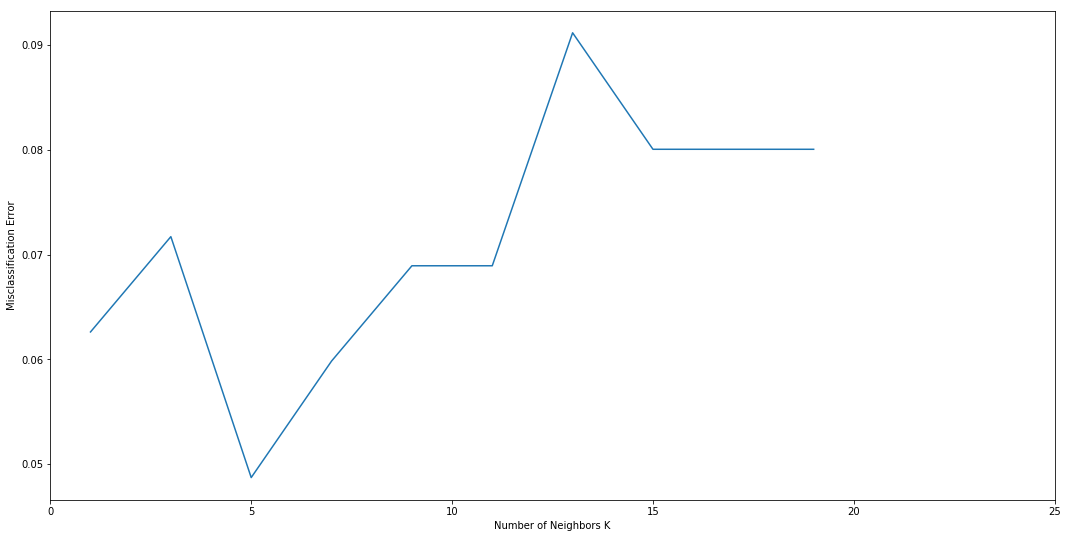

In [37]:
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()